# 1. Weibull

Commençons par l'estimation des paramètres d'une Weibull.

In [1]:
!pip install scikit-survival

   ---------------------------------------- 0.0/825.6 kB ? eta -:--:--
   --------------------------------------- 825.6/825.6 kB 12.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import weibull_min

%matplotlib inline

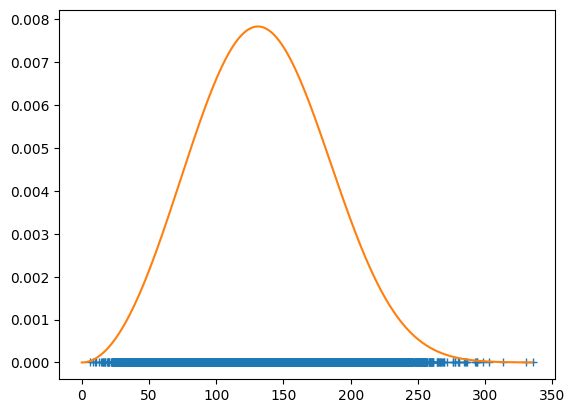

In [3]:
k = 3
lambda_w = 150

equipement_life = weibull_min.rvs(k, loc=0, scale=lambda_w, size=10000)
plt.plot(equipement_life, np.zeros(10000), '+')
d = np.arange(0, np.max(equipement_life))
survival = (k/lambda_w) * np.power((d/lambda_w),(k-1))*np.exp(-np.power((d/lambda_w), k))
plt.plot(d, survival)

1.1. Estimez k et lambda par la méthode graphique.

C:\Users\simon\AppData\Local\Temp\ipykernel_21392\3658714670.py:10: RuntimeWarning: divide by zero encountered in log
  log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]


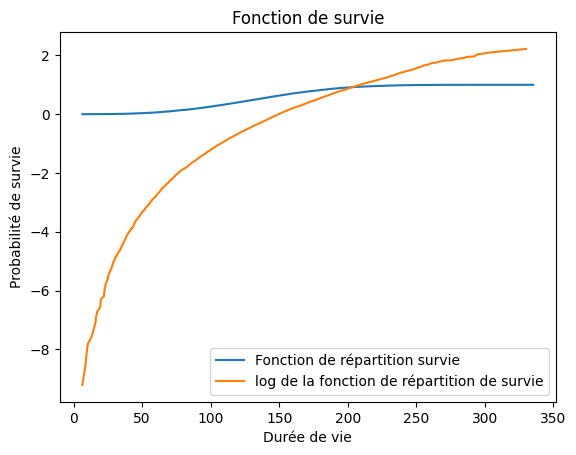

k: 3.0319775785416994
lambda: 149.73363018083268


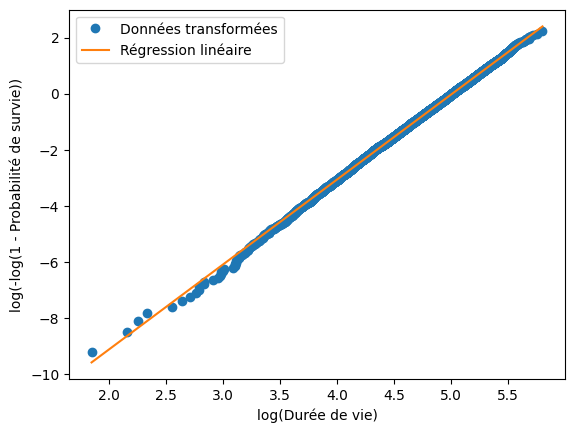

In [38]:
from sklearn.linear_model import LinearRegression

# Trier les durées de vie
sorted_life = np.sort(equipement_life)

# Calculer la fonction de survie
survival_prob = np.arange(1, len(sorted_life) + 1) / len(sorted_life)

# Transformation des données pour la régression linéaire
log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]

# Filtrer les valeurs infinies
filtered_indices = [i for i in range(len(log_survival_prob)) if np.isfinite(log_survival_prob[i])]
filtered_life = sorted_life[filtered_indices]
filtered_log_survival_prob = [log_survival_prob[i] for i in filtered_indices]

# Tracer la fonction de survie et sa transformation
plt.plot(sorted_life, survival_prob, label='Fonction de répartition survie')
plt.plot(filtered_life, filtered_log_survival_prob, label='log de la fonction de répartition de survie')
plt.xlabel('Durée de vie')
plt.ylabel('Probabilité de survie')
plt.title('Fonction de survie')
plt.legend()
plt.show()

# Préparation des données pour la régression linéaire
X = np.log(filtered_life).reshape(-1, 1)  # Utilisation de sorted_life > 0 pour éviter log(0)
y = np.array(filtered_log_survival_prob)

# Ajustement du modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Récupération des coefficients estimés
slope = model.coef_[0]
intercept = model.intercept_
lambda_hat = np.exp(-intercept * 1/slope)
print(f"k: {slope}")
print(f"lambda: {lambda_hat}")

# Prédiction des valeurs y pour les données d'entrée X
y_pred = model.predict(X)

# Affichage des résultats
plt.plot(X, y, 'o', label='Données transformées')
plt.plot(X, y_pred, '-', label='Régression linéaire')
plt.xlabel('log(Durée de vie)')
plt.ylabel('log(-log(1 - Probabilité de survie))')
plt.legend()
plt.show()

1.2.Estimez les valeurs de k et lambda par maximum de vraisemblance.

In [37]:
from scipy.optimize import minimize
# Réponse

# Définir la fonction de log-vraisemblance pour la distribution de Weibull
def log_likelihood(params, data):
    k, lambda_w = params
    if k <= 0 or lambda_w <= 0:
        return np.inf
    log_likelihood = np.sum(np.log(k) - k * np.log(lambda_w) + (k - 1) * np.log(data) - (data / lambda_w) ** k)
    return -log_likelihood  # On minimise donc on retourne le négatif

# Initial guess for k and lambda_w
initial_guess = [1, 1]

# Utiliser scipy.optimize.minimize pour trouver les valeurs de k et lambda_w qui maximisent la log-vraisemblance
result = minimize(log_likelihood, initial_guess, args=(equipement_life,), method='L-BFGS-B', bounds=[(0.01, None), (0.01, None)])

# Récupérer les valeurs estimées de k et lambda_w
k_est, lambda_w_est = result.x

print(f"Valeur estimée de k: {k_est}")
print(f"Valeur estimée de lambda: {lambda_w_est}")

Valeur estimée de k: 3.0110955294153507
Valeur estimée de lambda: 149.89302295832772


1.3. Faites varier le nombre d'échantillons, et comparez les deux méthodes.

C:\Users\simon\AppData\Local\Temp\ipykernel_21392\3010125917.py:14: RuntimeWarning: divide by zero encountered in log
  log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]
C:\Users\simon\AppData\Local\Temp\ipykernel_21392\3010125917.py:14: RuntimeWarning: divide by zero encountered in log
  log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]
C:\Users\simon\AppData\Local\Temp\ipykernel_21392\3010125917.py:14: RuntimeWarning: divide by zero encountered in log
  log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]
C:\Users\simon\AppData\Local\Temp\ipykernel_21392\3010125917.py:14: RuntimeWarning: divide by zero encountered in log
  log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]
C:\Users\simon\AppData\Local\Temp\ipykernel_21392\3010125917.py:14: RuntimeWarning: divide by zero encountered in log
  log_survival_prob = 

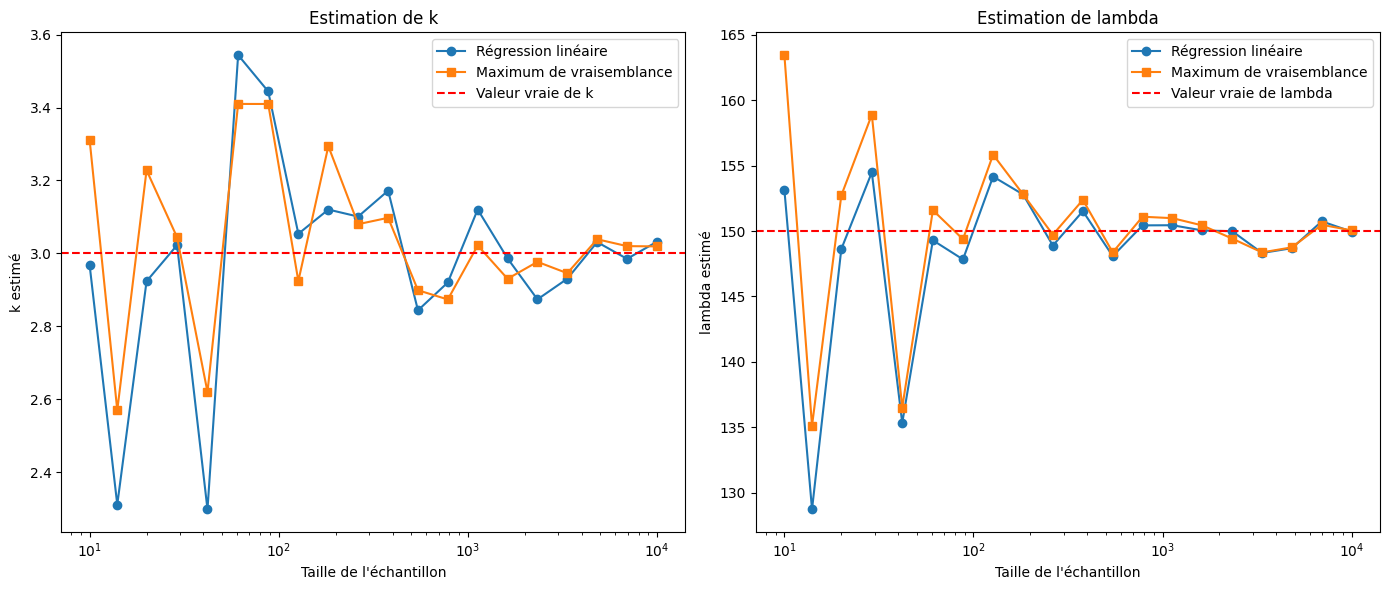

In [40]:
# Paramètres de la distribution de Weibull
k_true = 3
lambda_w_true = 150

# Fonction pour effectuer la régression linéaire
def linear_regression_method(equipement_life):
    # Trier les durées de vie
    sorted_life = np.sort(equipement_life)

    # Calculer la fonction de survie
    survival_prob = np.arange(1, len(sorted_life) + 1) / len(sorted_life)

    # Transformation des données pour la régression linéaire
    log_survival_prob = [np.log(-np.log(1 - survival_prob[i])) for i in range(len(survival_prob))]

    # Filtrer les valeurs infinies
    filtered_indices = [i for i in range(len(log_survival_prob)) if np.isfinite(log_survival_prob[i])]
    filtered_life = sorted_life[filtered_indices]
    filtered_log_survival_prob = [log_survival_prob[i] for i in filtered_indices]

    # Préparation des données pour la régression linéaire
    X = np.log(filtered_life).reshape(-1, 1)
    y = np.array(filtered_log_survival_prob)

    # Ajustement du modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # Récupération des coefficients estimés
    slope = model.coef_[0]
    intercept = model.intercept_
    lambda_hat = np.exp(-intercept / slope)

    return slope, lambda_hat

# Fonction pour effectuer l'estimation par maximum de vraisemblance
def maximum_likelihood_method(equipement_life):
    # Définir la fonction de log-vraisemblance pour la distribution de Weibull
    def log_likelihood(params, data):
        k, lambda_w = params
        if k <= 0 or lambda_w <= 0:
            return np.inf
        log_likelihood = np.sum(np.log(k) - k * np.log(lambda_w) + (k - 1) * np.log(data) - (data / lambda_w) ** k)
        return -log_likelihood  # On minimise donc on retourne le négatif

    # Initial guess for k and lambda_w
    initial_guess = [1, 1]

    # Utiliser scipy.optimize.minimize pour trouver les valeurs de k et lambda_w qui maximisent la log-vraisemblance
    result = minimize(log_likelihood, initial_guess, args=(equipement_life,), method='L-BFGS-B', bounds=[(0.01, None), (0.01, None)])

    # Récupérer les valeurs estimées de k et lambda_w
    k_est, lambda_w_est = result.x

    return k_est, lambda_w_est

# Tailles des échantillons à tester
sample_sizes = np.logspace(1, 4, num=20, dtype=int)

# Stocker les résultats
results = []

for size in sample_sizes:
    # Génération des données de vie de l'équipement
    equipement_life = weibull_min.rvs(k_true, loc=0, scale=lambda_w_true, size=size)

    # Méthode de régression linéaire
    k_lr, lambda_lr = linear_regression_method(equipement_life)

    # Méthode de maximum de vraisemblance
    k_mle, lambda_mle = maximum_likelihood_method(equipement_life)

    # Stocker les résultats
    results.append((size, k_lr, lambda_lr, k_mle, lambda_mle))

# Convertir les résultats en tableau numpy pour faciliter le traçage
results = np.array(results)

# Tracer les résultats
plt.figure(figsize=(14, 6))

# Tracer les valeurs de k
plt.subplot(1, 2, 1)
plt.plot(results[:, 0], results[:, 1], 'o-', label='Régression linéaire')
plt.plot(results[:, 0], results[:, 3], 's-', label='Maximum de vraisemblance')
plt.axhline(y=k_true, color='r', linestyle='--', label='Valeur vraie de k')
plt.xscale('log')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('k estimé')
plt.title('Estimation de k')
plt.legend()

# Tracer les valeurs de lambda
plt.subplot(1, 2, 2)
plt.plot(results[:, 0], results[:, 2], 'o-', label='Régression linéaire')
plt.plot(results[:, 0], results[:, 4], 's-', label='Maximum de vraisemblance')
plt.axhline(y=lambda_w_true, color='r', linestyle='--', label='Valeur vraie de lambda')
plt.xscale('log')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('lambda estimé')
plt.title('Estimation de lambda')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Kaplan-Meier

2.1 Implémentez l'estimateur de Kaplan-Meier sur les données ci-dessous.

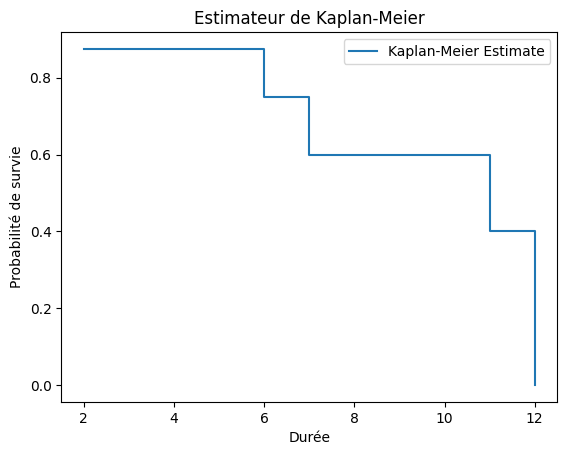

In [41]:
## Example Data
durations = np.array([2,7,12,12,6,7,9, 11])
event_observed = np.array([1, 0, 0, 1, 1, 1, 0, 1])
# Réponse

# Trier les données par durée
sorted_indices = np.argsort(durations)
sorted_durations = durations[sorted_indices]
sorted_events = event_observed[sorted_indices]

# Calculer la probabilité de survie à chaque point de temps
n = len(durations)
survival_prob = np.ones(n)
at_risk = n

for i in range(n):
    if sorted_events[i] == 1:
        survival_prob[i] = (at_risk - 1) / at_risk
    else:
        survival_prob[i] = 1
    at_risk -= 1

# Multiplier les probabilités de survie successives
km_survival = np.cumprod(survival_prob)

# Tracer la courbe de survie
plt.step(sorted_durations, km_survival, where='post', label='Kaplan-Meier Estimate')
plt.xlabel('Durée')
plt.ylabel('Probabilité de survie')
plt.title('Estimateur de Kaplan-Meier')
plt.legend()
plt.show()

2.2 Utilisez scikit-survival pour calculer un estimateur de Kaplan-Meier.

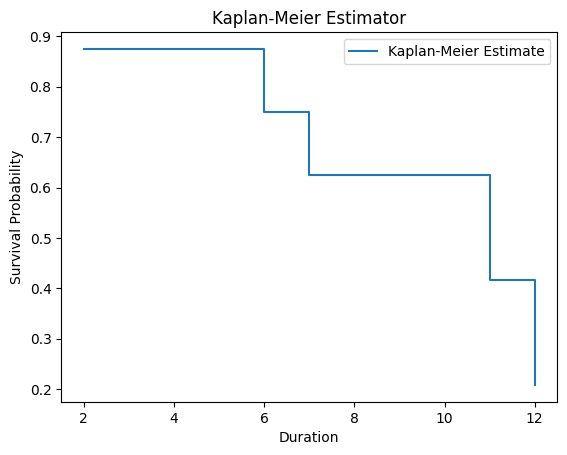

In [42]:
# Importing modules
import numpy as np
from matplotlib import pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

# Réponse

# Prepare the data for sksurv
data = np.array([(event_observed[i] == 1, durations[i]) for i in range(len(durations))],
                dtype=[('event', 'bool'), ('duration', 'float')])

# Calculate the Kaplan-Meier estimator
time, survival_prob = kaplan_meier_estimator(data['event'], data['duration'])

# Plot the survival function
plt.step(time, survival_prob, where="post", label="Kaplan-Meier Estimate")
plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Estimator')
plt.legend()
plt.show()

# 3 Influence des covariates

Nous prenons ici un dataset de maintenance prédictive. Il concerne un ensemble de machines, et leurs dates de panne. Il contient des descripteurs d'environnement, mais aussi des descripteurs sur qui a utilisé la machine (team) et qui l'a produite (provider). Nous ne nous occuperons que de la partie team & provider.

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

raw_dataset = pd.read_csv('maintenance.csv', sep=';')
raw_dataset.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [58]:
time_column = 'lifetime'
event_column = 'broken'

categories = ['provider', 'team']
dataset = pd.get_dummies(raw_dataset, columns = categories)
Covariates = dataset.loc[: , ['provider_Provider1',
                              'provider_Provider2',
                              'provider_Provider3',
                              'provider_Provider4',
                              'team_TeamA',
                              'team_TeamB',
                              'team_TeamC']]

Time = dataset.loc[:, time_column]
Event = dataset.loc[:, event_column]
print(Covariates.head())

   provider_Provider1  provider_Provider2  provider_Provider3  \
0               False               False               False   
1               False               False               False   
2                True               False               False   
3               False                True               False   
4                True               False               False   

   provider_Provider4  team_TeamA  team_TeamB  team_TeamC  
0                True        True       False       False  
1                True       False       False        True  
2               False        True       False       False  
3               False       False       False        True  
4               False       False        True       False  


3.1 Visualisez les données, et en particulier l'influence des paramètres proposés.

In [59]:
# Fonction pour tracer les courbes de survie pour chaque catégorie
def plot_km_survival(data, time_column, event_column, category_column):
    categories = data[category_column].unique()
    plt.figure(figsize=(10, 6))
    
    for category in categories:
        mask = data[category_column] == category
        time, survival_prob = kaplan_meier_estimator(data[event_column][mask].astype(bool), data[time_column][mask])
        plt.step(time, survival_prob, where="post", label=f"{category_column} = {category}")
    
    plt.xlabel('Duration')
    plt.ylabel('Survival Probability')
    plt.title(f'Survival Function by {category_column}')
    plt.legend()
    plt.show()

# Tracer les courbes de survie pour chaque provider
plot_km_survival(dataset, time_column, event_column, 'provider')

# Tracer les courbes de survie pour chaque team
plot_km_survival(dataset, time_column, event_column, 'team')

KeyError: 'provider'

3.2 Estimez les lois de vie pour les covariates suivants avec Kaplan-Meier et affichez les résultats sur une même figure :
- provider
- team

In [ ]:
# Réponse Team


In [ ]:
# Réponse Provider


3.3 Apprenez un modèle de Cox sur ces données. Analysez vos résultats en comparant les coefficients. Cela correspond-t-il aux courbes que vous avez observées ?

In [ ]:
import warnings

def fxn():
    warnings.warn("LinAlgWarning", DeprecationWarning)

from sksurv.linear_model import CoxPHSurvivalAnalysis
# Réponse


3.4. Calculer le Concordance-index sur le dataset.

In [ ]:
# réponse


3.5 Apprenez un Random Survival Forest sur ce données et calculez le Concordance-index.

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
# Réponse


3.6 Comparez plus rigoureusement les deux modèles, par 2 changements dans l'analyse. (conseil: regardez bien la documentation scikit survival).

In [ ]:
# Réponse.


3.7 Analysez vos résultats